# Practice PCA Cluster

#### Date: 01/03/2023

#### Author: Elena Aguayo Jara, Yiran Du

<br>
<font color='red'>TASK: Using the 'Wisconsin Diagnostic Breast Cancer' employed in the previous PCA notebook (available in the ./data folder of this notebook), the students will perform the following tasks: a) Read the dataset; b) Perform a PCA analysis over the data; c) Project the data into the PC space; d) Apply k-means over the projected data; e) Compare the obtained clusters with the real labels.
</font> 

In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()

### a) Read the dataset

In [14]:
# read the data
data_cancer = pd.read_csv('./data/wdbc.csv', header=None)
data_cancer.head() # visualized data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# focus on the features only and drop the labels and ID
# drop the labels because only the features are used, since PCA is a unsupervised machine learning method
df_cancer_ori = pd.DataFrame(data_cancer.values[ :, 2:].astype(float))
df_cancer_ori.head() # visualized data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### b) Perform a PCA analysis over the data

After a closer look of the features, due to the huge difference between each feature (e.g. field 3 contain numbers larger than 1000 and field 4 smaller than 0.2), the data need to be standardized. 

In [16]:
# Standardize the data of the features
df_cancer_std = sklearn.preprocessing.StandardScaler().fit_transform(df_cancer_ori)

After standardize the data, the follow code visualizes the variance ratio according to the number of components.

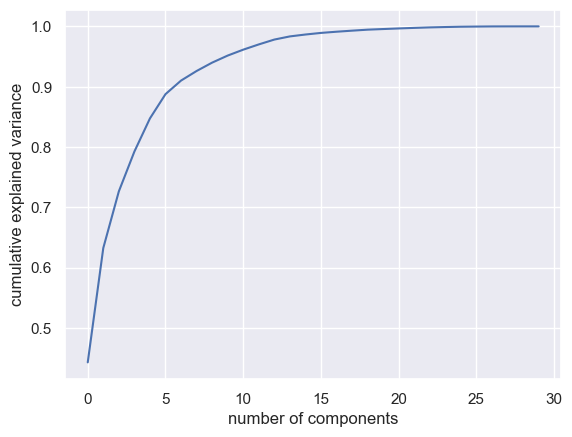

In [17]:
pca = PCA().fit(df_cancer_std)

# plot the variance ratio according to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### c) Project the data into the PC space

To project the data into the PC space, the number of the principal components need to be determined. The following block is used to define the number of components necessary to retain at least 90% of variance on the features.

In [18]:
variance_ratio = pca.explained_variance_ratio_
#print (variance_ratio)
accum = 0
for i in range(len(variance_ratio)):
    accum += variance_ratio[i]
    print ("NO.", i+1, "component retain:", round(variance_ratio[i]*100,3),"% of variance, therefore the first",  
           i+1, "components retain totally", round(accum*100,2), "% of variance on the features.")
    if accum >= 0.9:
        print ("The number of components necessary to retain at least 90% of variance on the features is :", (i+1))
        break  

NO. 1 component retain: 44.272 % of variance, therefore the first 1 components retain totally 44.27 % of variance on the features.
NO. 2 component retain: 18.971 % of variance, therefore the first 2 components retain totally 63.24 % of variance on the features.
NO. 3 component retain: 9.393 % of variance, therefore the first 3 components retain totally 72.64 % of variance on the features.
NO. 4 component retain: 6.602 % of variance, therefore the first 4 components retain totally 79.24 % of variance on the features.
NO. 5 component retain: 5.496 % of variance, therefore the first 5 components retain totally 84.73 % of variance on the features.
NO. 6 component retain: 4.025 % of variance, therefore the first 6 components retain totally 88.76 % of variance on the features.
NO. 7 component retain: 2.251 % of variance, therefore the first 7 components retain totally 91.01 % of variance on the features.
The number of components necessary to retain at least 90% of variance on the features is

Therefore, 7 principal components decomposition of all 30 features.

In [19]:
n_components = 7
pca = PCA(n_components=n_components)
pca.fit(df_cancer_std)
pca_final = pca.transform(df_cancer_std)
print ("Therefore, the original shape of the features is:", df_cancer_std.shape, 
       "and, the final shape of the features after PCA is:", pca_final.shape)

Therefore, the original shape of the features is: (569, 30) and, the final shape of the features after PCA is: (569, 7)


To visualize all the 7 PCs, the lables are added back to have a better view.

In [20]:
def label(x):
    if x == 'M':
        return 'Malign'
    else:
        return 'Benign'
df_label = data_cancer[1].apply(label)
df_pca = pd.DataFrame(pca_final, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
df_pca_label = pd.concat([df_pca, df_label],axis = 1)
df_pca_label.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "Label"]
df_pca_label.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,Malign
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,Malign
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,Malign
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,Malign
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936211,Malign


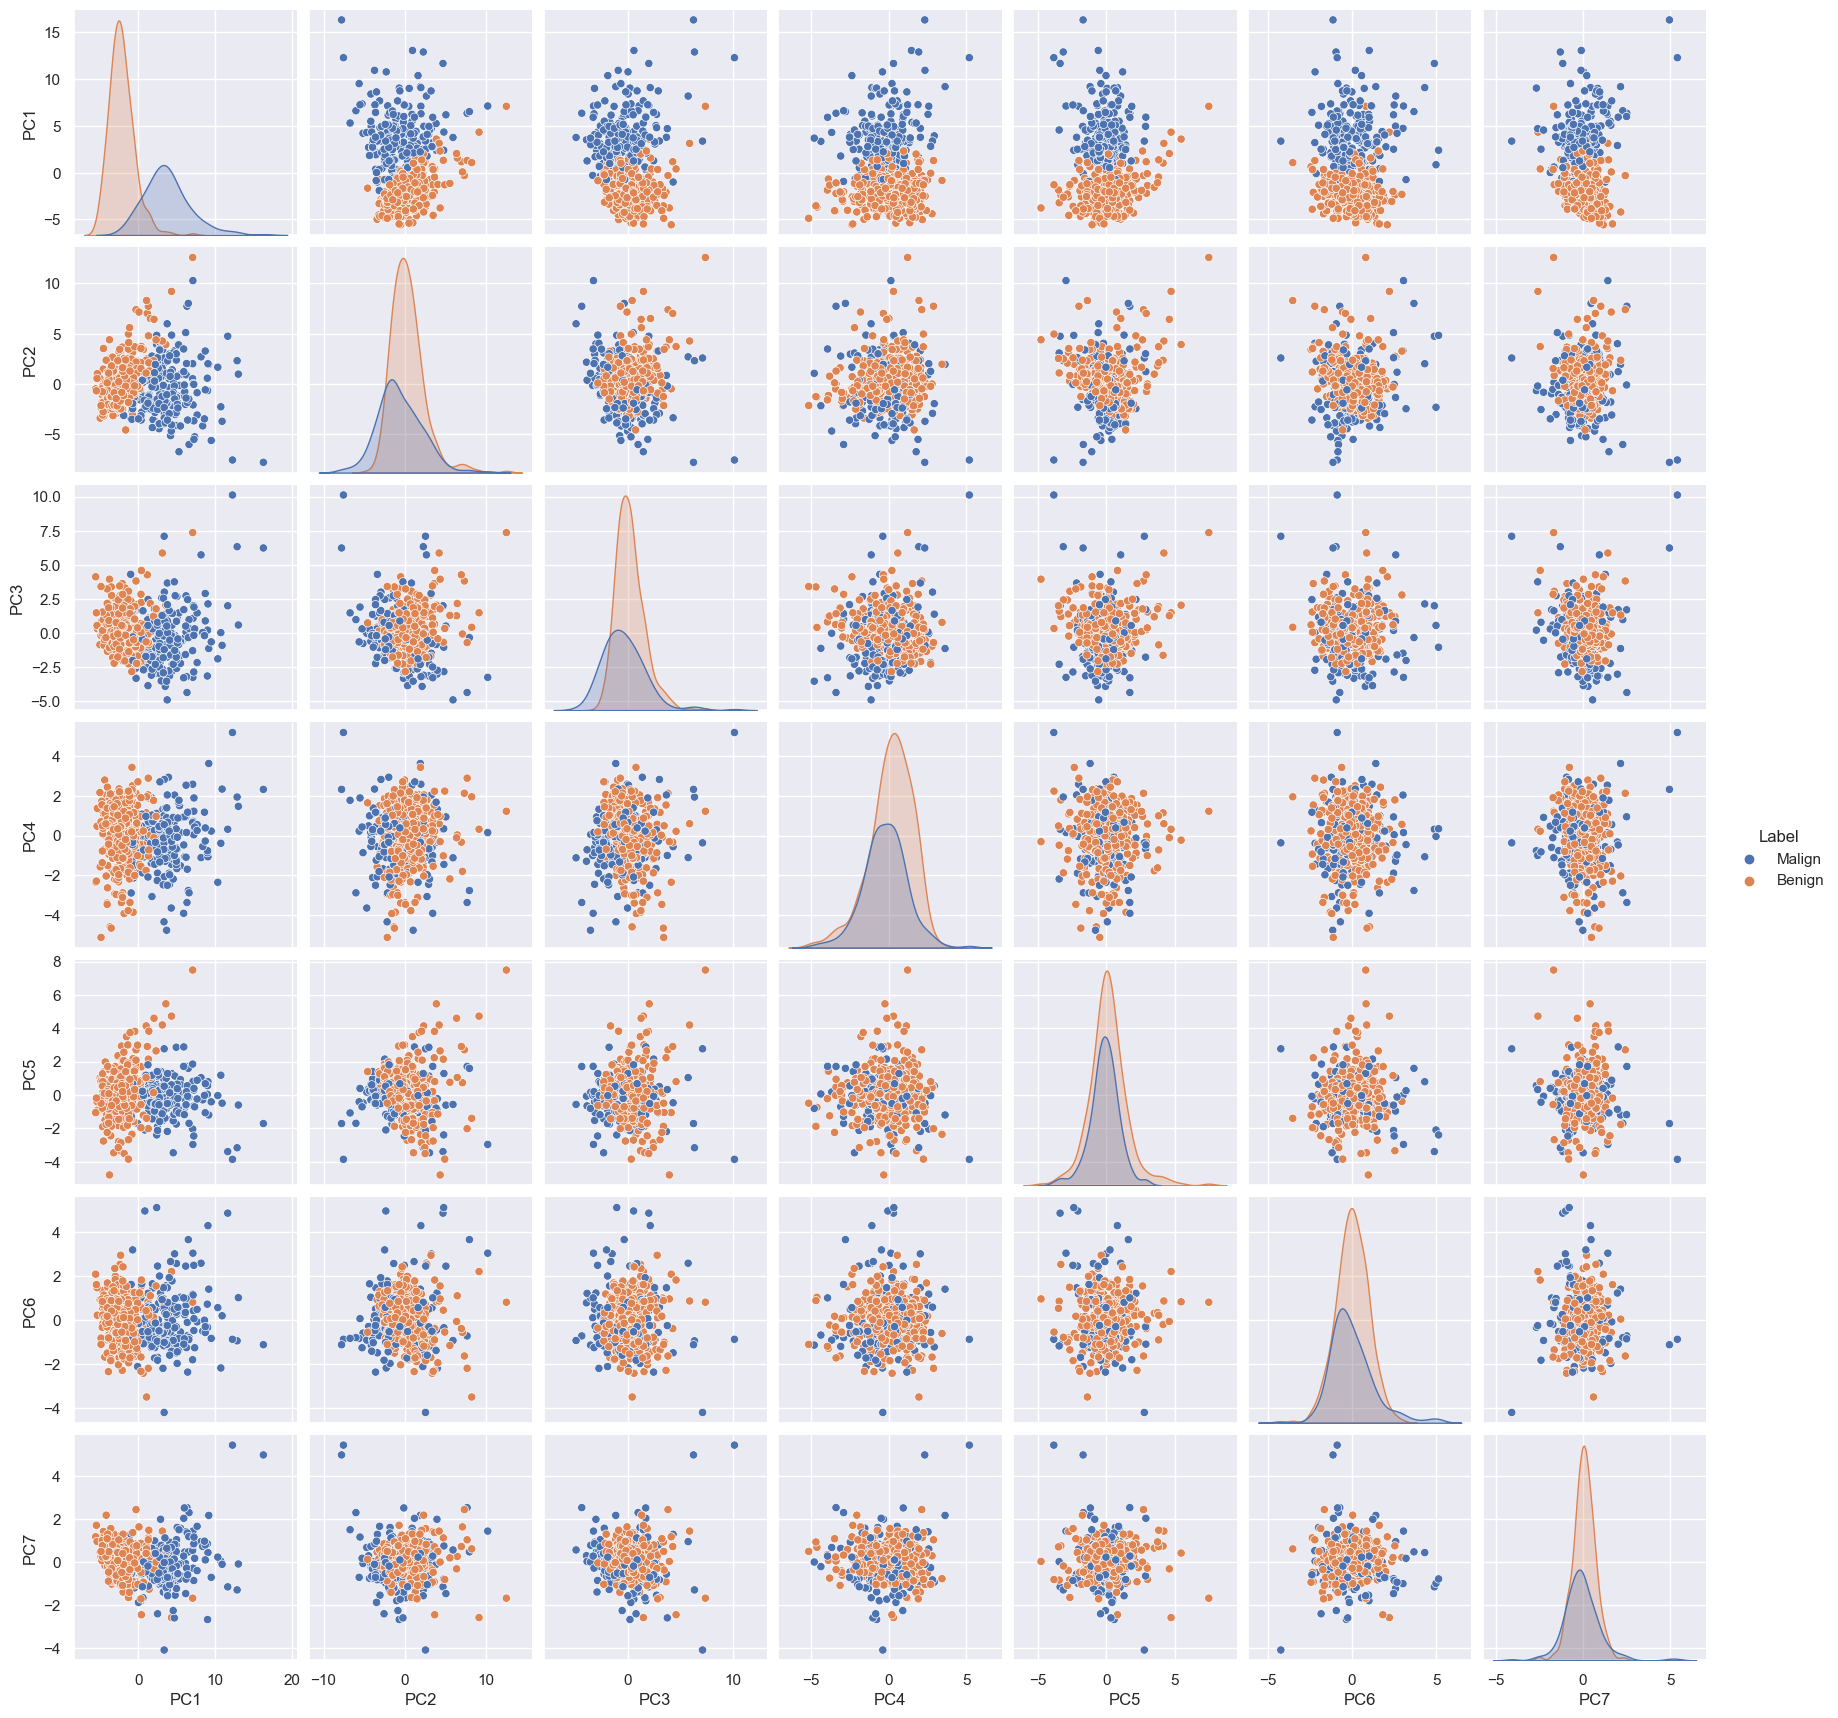

In [21]:
# Plot pairwise comparison to explore the 7 components
_ = sns.pairplot(df_pca_label, hue = "Label")
plt.show()

To have a closer look, the following two plots are presented, the first one is about PC1 and PC2, and the second one is a 3D plot about PC1, PC2 and PC3.

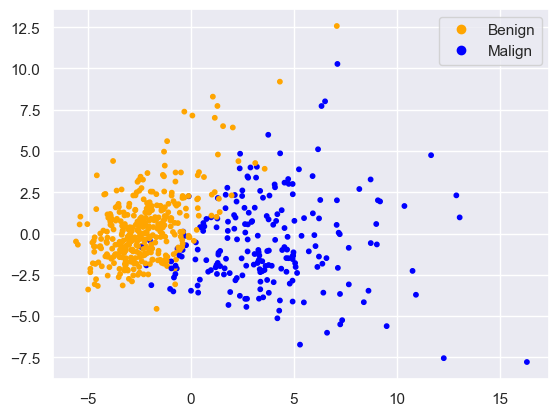

In [22]:
# plot first two PC with labels
def target(x):
    if x == 'M':
        return 1
    else:
        return 0
values = data_cancer[1].apply(target)
classes = ['Benign', 'Malign']
colours = ListedColormap(['orange','blue'])
scatter_label = plt.scatter(df_pca_label['PC1'], df_pca_label['PC2'], c = values, cmap = colours, s = 10)
plt.legend(handles = scatter_label.legend_elements()[0], labels = classes);

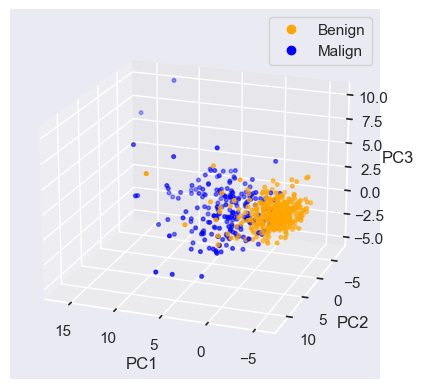

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_label['PC1'], df_pca_label['PC2'], df_pca_label['PC3'], c = values, cmap = colours, s = 7)
ax.legend(handles = scatter_label.legend_elements()[0], labels = classes)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(20, 110)

### d) Apply k-means over the projected data

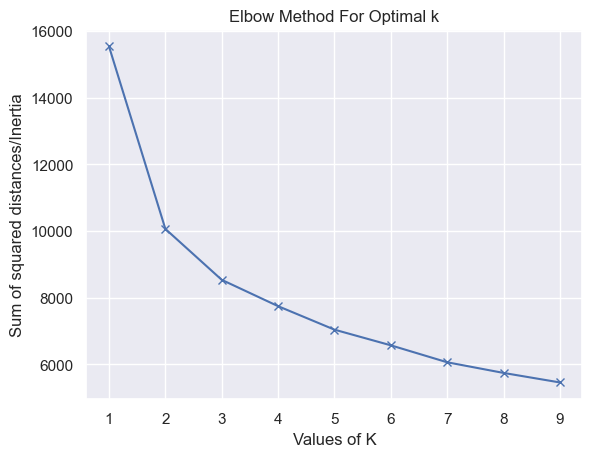

In [24]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_pca)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

After the Elbow test, we choose n_clusters=2

In [25]:
# n_clusters=2 
kmeans_labels = KMeans(n_clusters = 2, random_state = 0).fit_predict(df_pca)
df_kmeans = pd.DataFrame(kmeans_labels, columns = ["kmeans"])
df_pca_kmeans = pd.concat([df_pca, df_kmeans], axis = 1)
df_pca_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,kmeans
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936211,1


Same as before, the following plots are used to visualize all the 7 PCs with the kmeans labels.

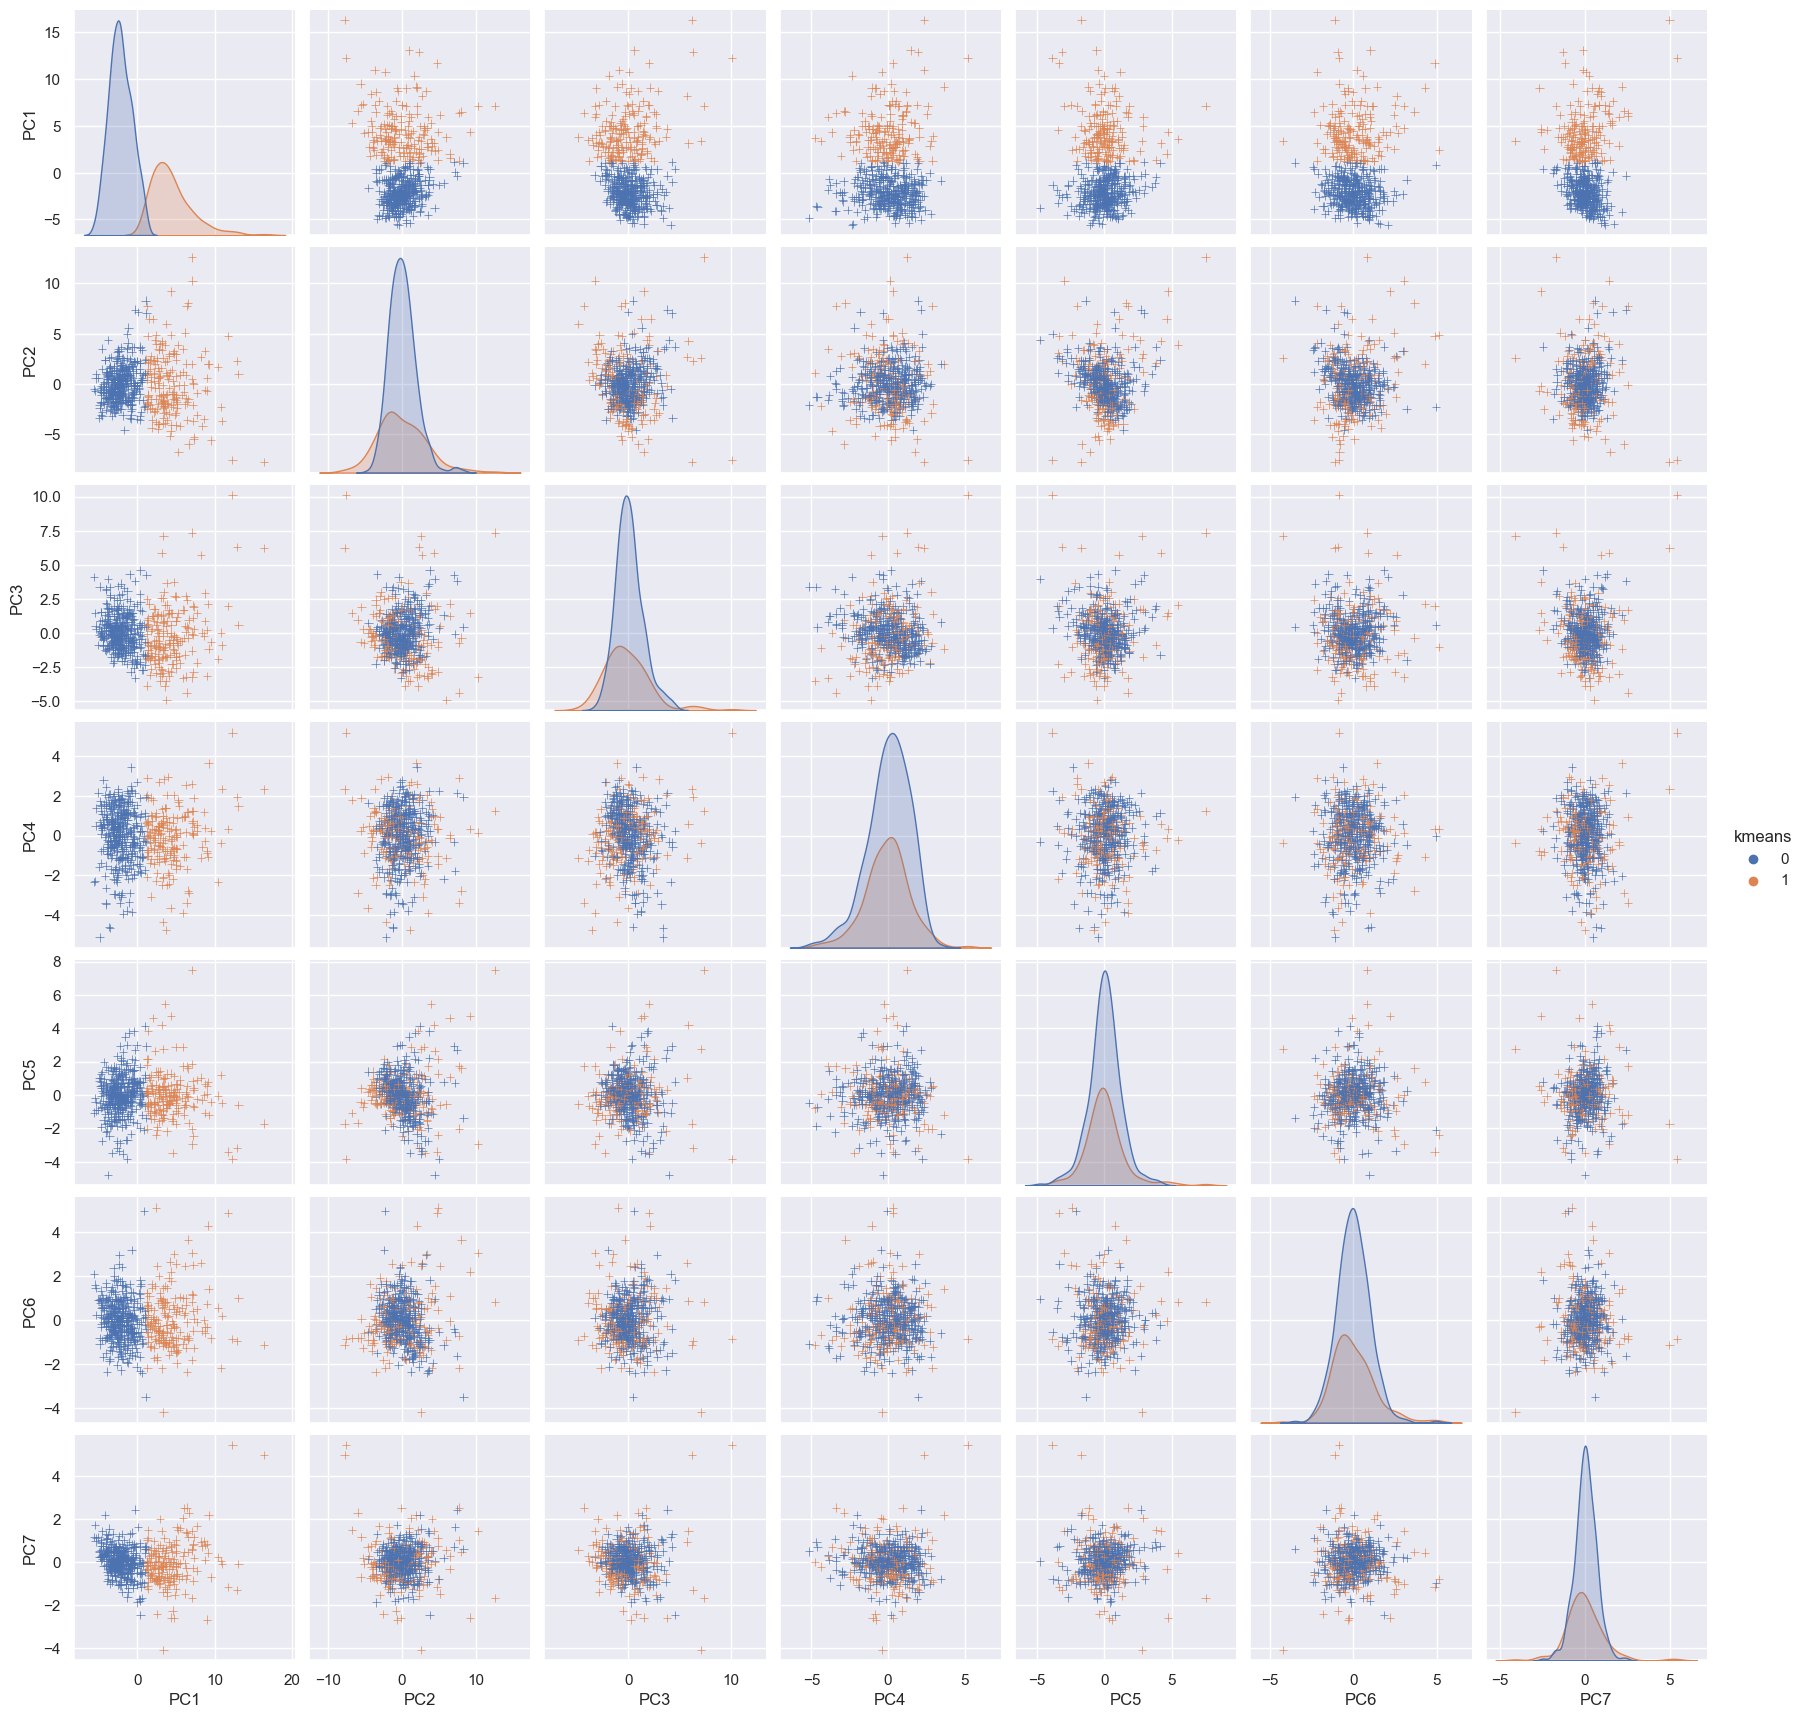

In [26]:
# Plot pairwise comparison to explore the 7 components with kmeans labels
_ = sns.pairplot(df_pca_kmeans, hue = "kmeans", markers = '+')
plt.show()


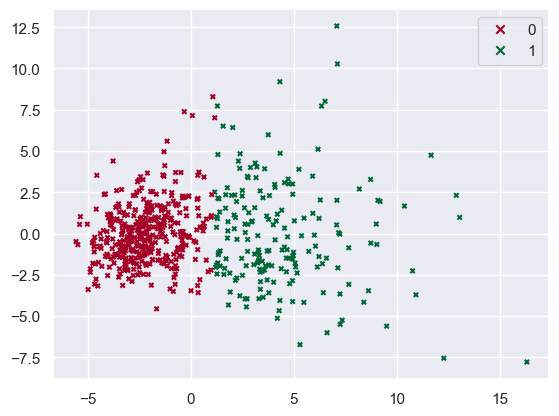

In [27]:
scatter_kmeans = plt.scatter(df_pca['PC1'], df_pca['PC2'], 
                             c = kmeans_labels, cmap = 'RdYlGn', marker = 'x', s = 10)
plt.legend(handles = scatter_kmeans.legend_elements()[0], labels = [0,1]);

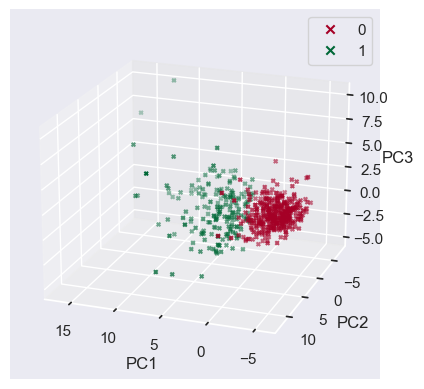

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
           c = kmeans_labels, cmap = 'RdYlGn', marker = 'x', s = 7)
ax.legend(handles = scatter_kmeans.legend_elements()[0], labels = [0,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(20, 110)

### e) Compare the obtained clusters with the real labels.

Before comparing the results, we creat a dataframe with all the infomation of labels we need.

In [29]:
df_pca_compare = pd.concat([df_pca_label,df_kmeans],axis =1)
df_pca_compare.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Label,kmeans
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,Malign,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,Malign,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,Malign,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,Malign,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936211,Malign,1


In [30]:
print("the number of cases that Real Label = Benign and K-means Cluster 0 is: ", 
      len(df_pca_compare[(df_pca_compare["Label"] == "Benign") & (df_pca_compare.kmeans == 0)]))
print("the number of cases that Real Label = Malign and K-means Cluster 1 is: ", 
      len(df_pca_compare[(df_pca_compare["Label"] == "Malign") & (df_pca_compare.kmeans == 1)]))
print("the number of cases that Real Label = Malign and K-means Cluster 0 is: ", 
      len(df_pca_compare[(df_pca_compare["Label"] == "Malign") & (df_pca_compare.kmeans == 0)]))
print("the number of cases that Real Label = Benign and K-means Cluster 1 is: ", 
      len(df_pca_compare[(df_pca_compare["Label"] == "Benign") & (df_pca_compare.kmeans == 1)]))

the number of cases that Real Label = Benign and K-means Cluster 0 is:  343
the number of cases that Real Label = Malign and K-means Cluster 1 is:  175
the number of cases that Real Label = Malign and K-means Cluster 0 is:  37
the number of cases that Real Label = Benign and K-means Cluster 1 is:  14


Therefore, only few difference between the K-means cluster result and the real label. The difference could be created from the process of PCA due to the fact that only about 90% of the variance are retained.

The following plots show the clusters result and the real labels together to facilitate the comparison.

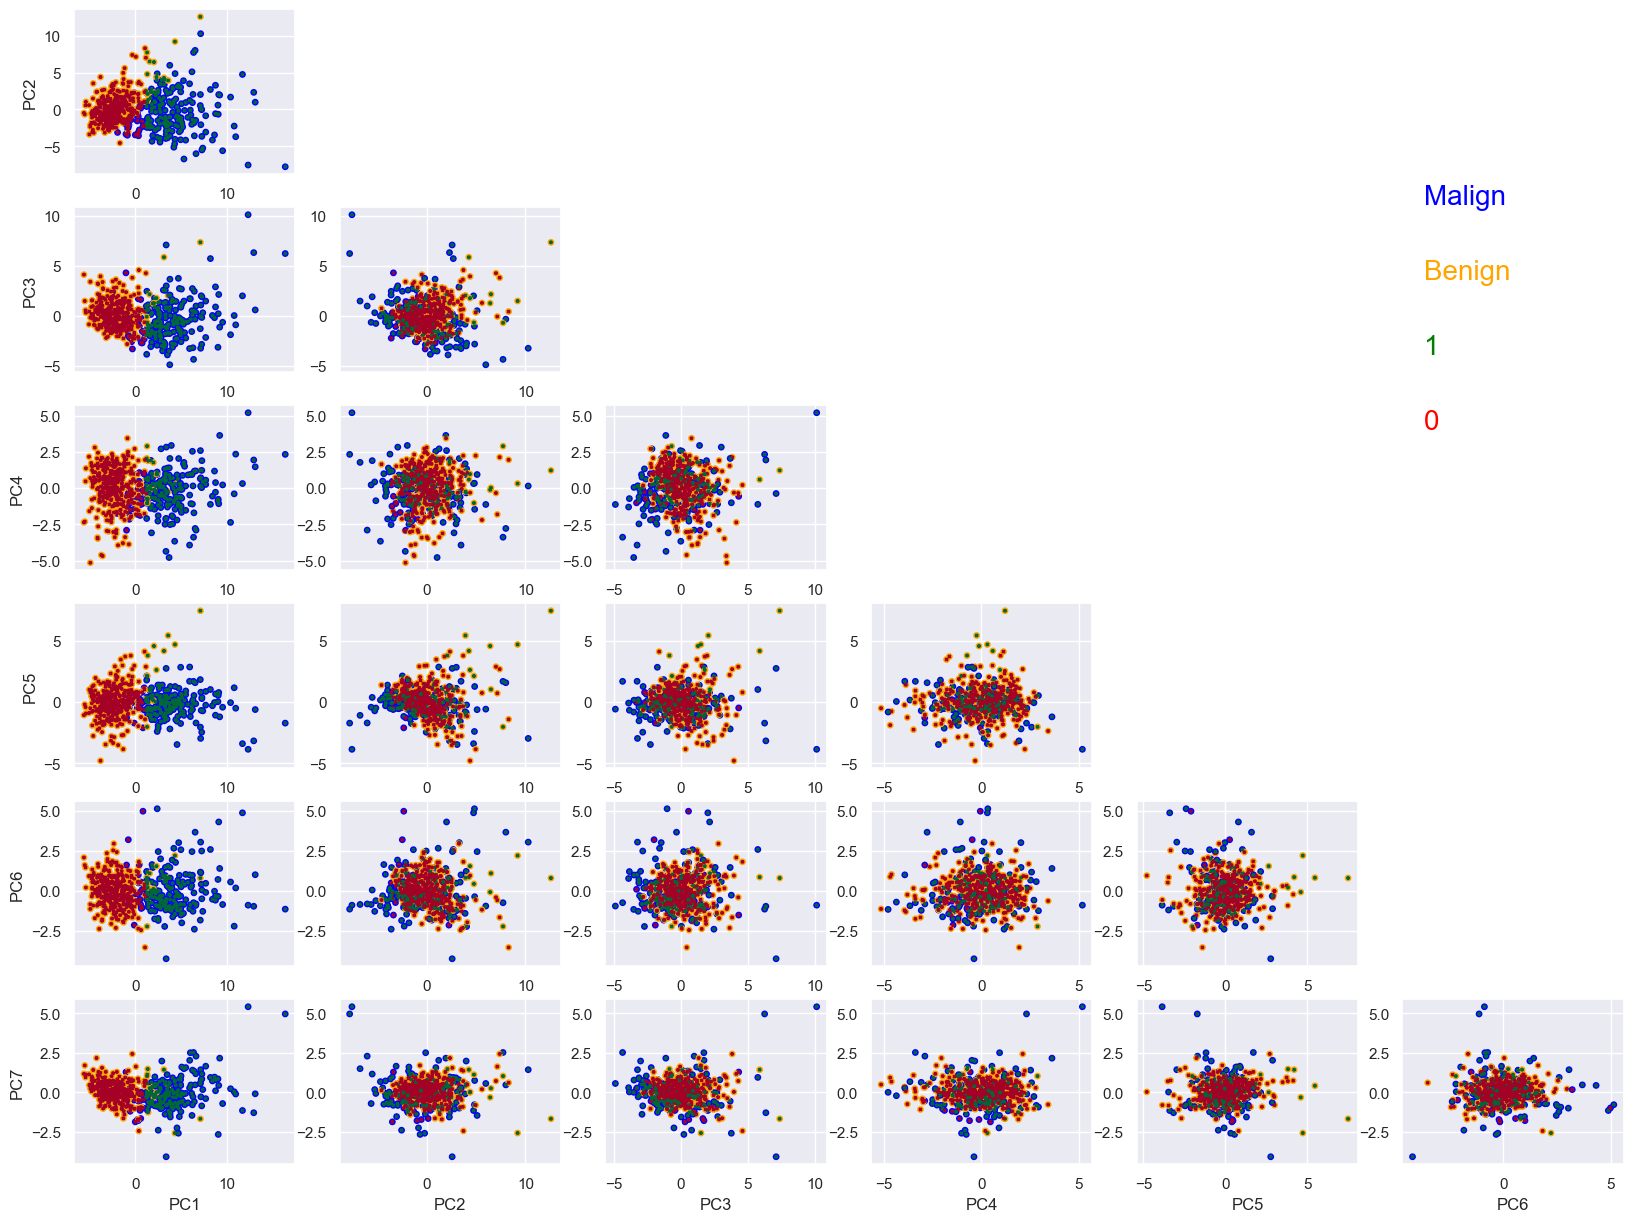

In [31]:
plt.figure(figsize=(20, 15))

text = [("Malign", 'blue'), ("Benign", 'orange'), ("1", 'green'), ("0", 'red')]

for i, (txt, color) in enumerate(text):
    plt.figtext(0.8, 0.75-i*0.05, txt, color=color, fontsize=20)

for i in range(6):
    for j in range(i+1):
        idx = 6*i+j+1
        
        if j == 0:
            plt.subplot(6, 6, idx)
            plt.ylabel(f'PC{i+2}')

        else:
            plt.subplot(6, 6, idx)
        
        if i == 5:
                plt.xlabel(f'PC{j+1}')
        
        
        scatter_label = plt.scatter(df_pca_label[f'PC{j+1}'], df_pca_label[f'PC{i+2}'], 
                                    c = values, cmap = colours, s = 15)
        scatter_kmeans = plt.scatter(df_pca[f'PC{j+1}'], df_pca[f'PC{i+2}'], 
                                     c = kmeans_labels, cmap = 'RdYlGn', marker = 'x', s = 4)
        
plt.show()

In the above plot, it can be easily observe in the first column that most of the different results are found at the intersection, which indicates that the K-means Cluster algorithm does not perform well when dealing with intersection values.